# MATH 210 Introduction to Mathematical Computing

## March 17, 2017

1. Numerical solutions of ODEs with SciPy
    * Review of ODE terminology
    * Solving first order ODEs with scipy.integrate.odeint
2. Examples    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Numerical solutions of ODEs with SciPy

### Review of ODE terminology

A **differential equation** is an equation involving an unknown function $y(t)$ and its derivatives $y'(t), y''(t), \dots$.

For example, $y(t) = \sin(t)$ is a solution of the second order differential equation $y'' + y = 0$.

The **order** of a differential equation is the highest order derivative of the unknown function $y$ which appears in the equation. For example, $y' + 2y = t$ is a first order equation and $y'' + 2y' - y = e^t$ is a second order equation.

A differential equation is **linear** if it only involves $y$ and its derivatives on their own and not composed with another function. For example, $y''' + 3y'' + y = \sin(t)$ is a linear equation because $y'''$, $y''$ and $y$ appear on their own, and $y' + y^2 = 0$ is nonlinear because of the term $y^2$, and $y'' + \sin(y) = 0$ is also nonlinear because of the term $\sin(y)$.

Solving nonlinear differential equations explicitly is usually impossible but we can always approximate solutions numerically.

### Solving first order ODEs with scipy.integerate.odeint

The main ODE solver in SciPy is `scipy.integrate.odeint`. Let's take a look at the documentation.

In [2]:
import scipy.integrate as spi

In [3]:
spi.odeint?

We see that `odeint` takes at least 3 input parameters:

* a function `func` defining the right side of a first order differential equation $y' = f(y,t)$
* `y0` is the initial condition $y(0)$
* `t` is an array of $t$ values where we want to approximate $y(t)$

Let's consider some simple first order examples.

### Example: $y'=y$, $y(0)=1$

We know the solution is $y(t) = e^t$. Let's use `odeint` to solve the equation numerically and compare to the true solution.

In [4]:
# Function defining right side of y' = f(y,t)
# In this case, f(y,t) = y
def f(y,t):
    return y

In [5]:
# Initial condition y(0) = 1
y0 = 1

In [6]:
# Array of t values where we want y(t)
# The first t value must be t = 0, corresponding to the initial condition y(0) = 1
t = np.linspace(0,2,50)

In [7]:
y = spi.odeint(f,y0,t)

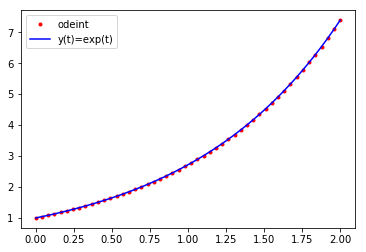

In [8]:
# Compare with the true solution y(t) = e^t
Y = np.exp(t)
plt.plot(t,y,'r.',t,Y,'b'), plt.legend(['odeint','y(t)=exp(t)']);

### Example: $y' = \sin(y)$, $y(0) = 1$

In [9]:
def f(y,t):
    return np.sin(y)

In [10]:
y0 = 1

In [11]:
t = np.linspace(0,10,100)

In [12]:
y = spi.odeint(f,y0,t)

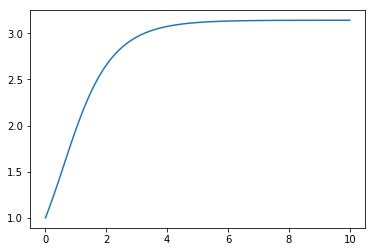

In [13]:
plt.plot(t,y);

### Example: $y' = \sin(y) + \cos(2y)$, $y(0) = 1$

In [14]:
def f(y,t):
    return np.sin(y) + np.cos(2*y)

In [15]:
y0 = 1

In [16]:
t = np.linspace(0,5*np.pi,100)

In [17]:
y = spi.odeint(f,y0,t)

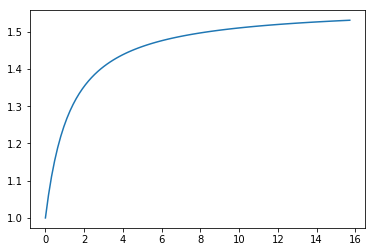

In [19]:
plt.plot(t,y);

## 2. Exercises

**Exercise.** Plot the solution of the equation $y' = y^2 - t^2$ for the initial values $y(-2) = k$ for $k = -3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1$ (all in the same figure).

**Exercise.** Plot the solution of the equation $y' = y^2 - 1$ for the initial values $y(0) = k$ for $k = -1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1$.